#**K-Nearest Neighbour**

What is KNN? KNN is a model that classifies data points based on the points that are most similar to it. It uses test data to make an “educated guess” on what an unclassified point should be classified as.

***Pros:***
* Easy to use.
Quick calculation time.
* Does not make assumptions about the data.

***Cons:***
* Accuracy depends on the quality of the data.
* Must find an optimal k value (number of nearest neighbors).
* Poor at classifying data points in a boundary where they can be classified one way or another.

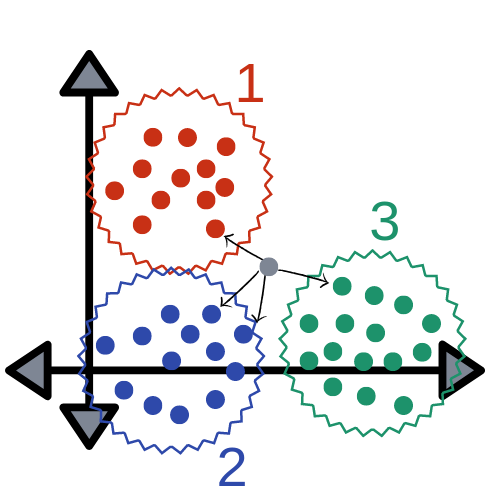

KNN is an algorithm that is considered both non-parametric and an example of lazy learning. What do these two terms mean exactly?
Non-parametric means that it makes no assumptions. The model is made up entirely from the data given to it rather than assuming its structure is normal.
Lazy learning means that the algorithm makes no generalizations. This means that there is little training involved when using this method. Because of this, all of the training data is also used in testing when using KNN.

***Where to use KNN***

* KNN is often used in simple recommendation systems, image recognition technology, and decision-making models. 
* It is the algorithm companies like Netflix or Amazon use in order to recommend different movies to watch or books to buy. Netflix even launched the Netflix Prize competition, awarding $1 million to the team that created the most accurate recommendation algorithm!

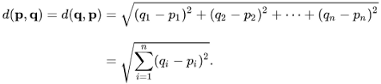

The image above visualizes how KNN works when trying to classify a data point based a given data set. It is compared to its nearest points and classified based on which points it is closest and most similar to. Here you can see the point Xj will be classified as either W1 (red) or W3 (green) based on its distance from each group of points.

***The Mathematics Behind KNN***

Just like almost everything else, KNN works because of the deeply rooted mathematical theories it uses. When implementing KNN, the first step is to transform data points into feature vectors, or their mathematical value. The algorithm then works by finding the distance between the mathematical values of these points. The most common way to find this distance is the Euclidean distance, as shown below.

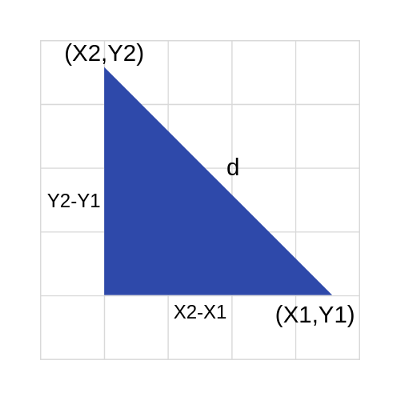


KNN runs this formula to compute the distance between each data point and the test data. It then finds the probability of these points being similar to the test data and classifies it based on which points share the highest probabilities.
To visualize this formula, it would look something like this:
Image for post

In [ ]:
# Read Data

def ReadData(fileName): 

	# Read the file, splitting by lines 
	f = open(fileName, 'r'); 
	lines = f.read().splitlines(); 
	f.close(); 

	items = []; 

	for i in range(1, len(lines)): 
		line = lines[i].split(','); 
		itemFeatures = []; 

		for j in range(len(line)-1): 
			
			# Convert feature value to float 
			v = float(line[j]); 
			
			# Add feature value to dict 
			itemFeatures.append(v); 

		items.append(itemFeatures); 

	shuffle(items); 

	return items; 

# Initialize Means

def FindColMinMax(items): 
	n = len(items[0]); 
	minima = [sys.maxint for i in range(n)]; 
	maxima = [-sys.maxint -1 for i in range(n)]; 
	
	for item in items: 
		for f in range(len(item)): 
			if (item[f] < minima[f]): 
				minima[f] = item[f]; 
			
			if (item[f] > maxima[f]): 
				maxima[f] = item[f]; 

return minima,maxima; 

# Initialize each mean’s feature values randomly 

def InitializeMeans(items, k, cMin, cMax): 

	# Initialize means to random numbers between 
	# the min and max of each column/feature	 
f = len(items[0]); # number of features 
means = [[0 for i in range(f)] for j in range(k)]; 
	
	for mean in means: 
		for i in range(len(mean)): 

			# Set value to a random float 
			# (adding +-1 to avoid a wide placement of a mean) 
			mean[i] = uniform(cMin[i]+1, cMax[i]-1); 

def EuclideanDistance(x, y): 
	S = 0; # The sum of the squared differences of the elements 
	for i in range(len(x)): 
		S += math.pow(x[i]-y[i], 2) 

	#The square root of the sum 
	return math.sqrt(S) 
 
# Update Means

def UpdateMean(n,mean,item): 
	for i in range(len(mean)): 
		m = mean[i]; 
		m = (m*(n-1)+item[i])/float(n); 
		mean[i] = round(m, 3); 
	
	return mean;

  # Classify Items

  def Classify(means,item): 

	# Classify item to the mean with minimum distance	 
	minimum = sys.maxint; 
	index = -1; 

	for i in range(len(means)): 

		# Find distance from item to mean 
		dis = EuclideanDistance(item, means[i]); 

		if (dis < minimum): 
			minimum = dis; 
			index = i; 
	
	return index; 

# Find Means

def CalculateMeans(k,items,maxIterations=100000): 

	# Find the minima and maxima for columns 
	cMin, cMax = FindColMinMax(items); 
	
	# Initialize means at random points 
	means = InitializeMeans(items,k,cMin,cMax); 
	
	# Initialize clusters, the array to hold 
	# the number of items in a class 
	clusterSizes= [0 for i in range(len(means))]; 

	# An array to hold the cluster an item is in 
	belongsTo = [0 for i in range(len(items))]; 

	# Calculate means 
	for e in range(maxIterations): 

		# If no change of cluster occurs, halt 
		noChange = True; 
		for i in range(len(items)): 

			item = items[i]; 

			# Classify item into a cluster and update the 
			# corresponding means.		 
			index = Classify(means,item); 

			clusterSizes[index] += 1; 
			cSize = clusterSizes[index]; 
			means[index] = UpdateMean(cSize,means[index],item); 

			# Item changed cluster 
			if(index != belongsTo[i]): 
				noChange = False; 

			belongsTo[i] = index; 

		# Nothing changed, return 
		if (noChange): 
			break; 

	return means;

# Find Clusters

def FindClusters(means,items): 
	clusters = [[] for i in range(len(means))]; # Init clusters 
	
	for item in items: 

		# Classify item into a cluster 
		index = Classify(means,item); 

		# Add item to cluster 
		clusters[index].append(item); 

	return clusters; 



	return means; 
